# Data Analysis and Visualization of Computer Mouse Movement

This code was developed to analyze data and generate figures for "Evaluating Mouse Control and Usability Patterns Across Tremor and Non-Tremor Populations"

### Loading necessary libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

### Cursor Data for Exemplar Participants

<Figure size 350x700 with 0 Axes>

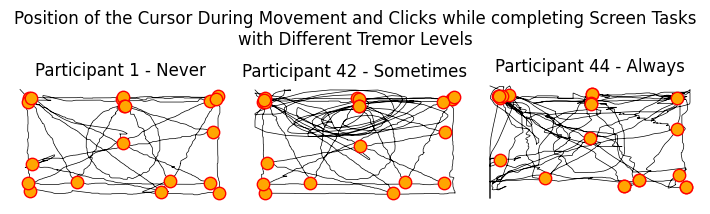

In [21]:
# participant reporting tremors always
A = pd.read_csv("./data/positions_44.txt", sep='\t', header=None, names=['time', 'X', 'Y'])
# participant reporting tremors sometimes
S = pd.read_csv("./data/positions_41.txt", sep='\t', header=None, names=['time', 'X', 'Y'])
# participant reporting not having tremors
N = pd.read_csv("./data/positions_1.txt", sep='\t', header=None, names=['time', 'X', 'Y'])

# Find Position of Clicks
A_clicks = A[A['time'] == 'Mouse Click'].index
S_clicks = S[S['time'] == 'Mouse Click'].index
N_clicks = N[N['time'] == 'Mouse Click'].index

A_clicks = A.loc[A_clicks-1]
S_clicks = S.loc[S_clicks-1]
N_clicks = N.loc[N_clicks-1]

# Plot
fig = plt.figure(figsize=(3.5, 7))
fig = plt.figure(figsize=(7.2,  2.2))
fig.suptitle('Position of the Cursor During Movement and Clicks while completing Screen Tasks\nwith Different Tremor Levels', fontsize=12) 

# Time Domain
ax = plt.subplot(1, 3, 1)
plt.plot(N['X'], N['Y'], linewidth=0.5, color='black')
plt.scatter(N_clicks['X'], N_clicks['Y'],
            color='orange',       # solid fill
            edgecolors='red', # optional border
            s=80,               # marker size
            marker='o',         # filled circle
            zorder=2)          # fully opaque

plt.title('Participant 1 - Never', fontsize=12)
plt.axis('off')
ax.set_aspect('equal')
ax.invert_yaxis()

ax = plt.subplot(1, 3, 2)
plt.plot(S['X'],S['Y'], linewidth=0.5, color='black')
plt.scatter(S_clicks['X'],S_clicks['Y'],
            color='orange',       # solid fill
            edgecolors='red', # optional border
            s=80,               # marker size
            marker='o',         # filled circle
            zorder=2)          # fully opaque

plt.title("Participant 42 - Sometimes", fontsize=12)
plt.axis('off')
ax.set_aspect('equal')
ax.invert_yaxis()

ax = plt.subplot(1, 3, 3)
plt.plot(A['X'], A['Y'], linewidth=0.5, color='black')
plt.scatter(A_clicks['X'], A_clicks['Y'],
            color='orange',       # solid fill
            edgecolors='red', # optional border
            s=80,               # marker size
            marker='o',         # filled circle
            zorder=2)          # fully opaque

plt.title("Participant 44 - Always", fontsize=12)
plt.axis('off')
ax.set_aspect('equal')
ax.invert_yaxis()


plt.tight_layout()
plt.savefig('cursor.png', dpi=300, bbox_inches='tight')

## Cursor Data for Selected Participant 

(np.float64(-94.5),
 np.float64(1984.5),
 np.float64(1036.35),
 np.float64(-49.35))

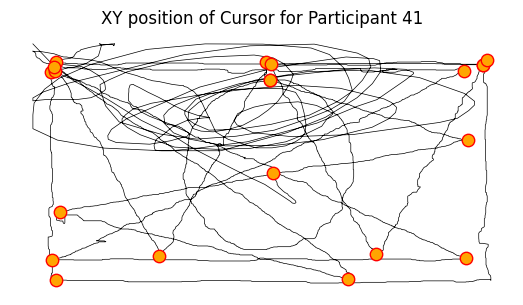

In [10]:
participant = '41'

# Load Cursor Data
cursor = pd.read_csv("./data/positions_" + participant + ".txt", sep='\t', header=None, names=['time', 'X', 'Y'])
# Identify Times of Clicks
clicks = cursor[cursor['time'] == 'Mouse Click'].index
clicks = cursor.loc[clicks-1]
# Remove non-numerical rows (i.e. ones that state 'Mouse Click')
cursor.dropna(inplace=True)
# Change time to a numeric
cursor['time'] = pd.to_numeric(cursor['time'])
# Offset time by first click so that the IMU and Cursor data are aligned
cursor['time'] = cursor['time'] - float(clicks.iloc[0]['time'])

# Plot
fig = plt.figure(figsize=(6.5, 5))
ax = plt.subplot(1, 1, 1)

plt.plot(cursor['X'], cursor['Y'], linewidth=0.5, color='black')
plt.scatter(clicks['X'], clicks['Y'],
            color='orange',       # solid fill
            edgecolors='red', # optional border
            s=80,               # marker size
            marker='o',         # filled circle
            zorder=2)          # fully opaque
ax.invert_yaxis()
ax.set_aspect('equal')
plt.title('XY position of Cursor for Participant ' + str(participant))
plt.axis('off')
 